In [144]:
import pandas as pd 
import numpy as np 
import math
import statistics as sta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [145]:
abalone = pd.read_csv('D:\School\Applied ML FSU\Applied-ML-FSU\Data/abalone.csv', header = None)

In [146]:
abalone.head()

,0,1,2,3,4,5,6,7
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [147]:
X = abalone.drop(7, axis = 1)
y = abalone[7]

In [148]:
X.head()

,0,1,2,3,4,5,6
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [149]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: 7, dtype: int64

Run through training all the models on one split first, then we'll loop to get the 20 different splits

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

## Null Model

In [151]:
avg = y_train.mean()

In [152]:
print(avg)

9.917531258313382


### MSE for Null Model

In [153]:
MSE_test_null = sum((y_test - avg)**2)/len(y_test)

In [154]:
print(MSE_test_null)

9.811688502329849


In [155]:
MSE_train_null = sum((y_train - avg)**2)/len(y_train)

In [156]:
print(MSE_train_null)

10.457684142079353


## Linear Regression Model

In [157]:
X_transpose = np.transpose(X_train)

In [158]:
X_Xt = X_transpose.dot(X_train)

In [159]:
X_Xt.shape

(7, 7)

In [160]:
placeholder = X_Xt + 0.001*(np.identity(7))

In [161]:
inverse = np.linalg.inv(placeholder)

In [162]:
next = inverse.dot(X_transpose)

In [163]:
final = next.dot(y_train)

In [164]:
print(final)

[  6.04813545  13.6011476   14.08578378   8.45299208 -20.97145642
 -10.57314953   6.81732164]


In [165]:
final.shape

(7,)

In [166]:
def linear_regressor(x):
    est = 0
    for i in range(len(x.index)):
        est += final[i]*x[i]

    return est

In [167]:
X_train.head()

,0,1,2,3,4,5,6
1584,0.515,0.375,0.110,0.6065,0.3005,0.1310,0.1500
1087,0.450,0.365,0.125,0.4620,0.2135,0.0985,0.1315
37,0.450,0.355,0.105,0.5225,0.2370,0.1165,0.1450
1140,0.575,0.455,0.135,0.9070,0.4245,0.1970,0.2600
364,0.620,0.500,0.175,1.1860,0.4985,0.3015,0.3500


In [168]:
y_train.head()

1584     6
1087     8
37       8
1140     9
364     12
Name: 7, dtype: int64

In [169]:
X_train.iloc[0]

0    0.5150
1    0.3750
2    0.1100
3    0.6065
4    0.3005
5    0.1310
6    0.1500
Name: 1584, dtype: float64

In [170]:
linear_regressor(X_train.iloc[0])

8.226989023809525

In [171]:
linear_regressor(X_train.iloc[1])

8.7297017619764

In [172]:
reg = []
for i in range(len(X_train.index)):
    reg.append(linear_regressor(X_train.iloc[i]))

In [173]:
reg

[8.226989023809525,
 8.7297017619764,
 8.232268556194256,
 10.021854589531596,
 11.78466551557595,
 8.942077351630203,
 13.518738500602966,
 3.5093330408985457,
 5.506543259829778,
 13.169399172018549,
 10.280320999399468,
 11.194577652806792,
 11.375707596816431,
 8.906371289991398,
 11.431610486740386,
 8.419962774496671,
 8.947597939528338,
 11.382548212145242,
 10.654599472637003,
 8.339109138851896,
 8.817956986251675,
 11.476693460180226,
 13.240744920769021,
 9.223371149686841,
 9.089849446895222,
 9.842732432630195,
 12.457547161394302,
 7.700525481213738,
 10.168324480014777,
 12.06419954944431,
 9.604519883990957,
 9.360655255690654,
 11.72014701754962,
 7.227545165804895,
 3.1168854909424675,
 7.227602760454656,
 9.254267986676785,
 12.935982272851666,
 9.50160567399805,
 8.726116531971254,
 10.259234804576055,
 12.211090639078833,
 11.309520261005096,
 7.190433232268271,
 10.41380898513958,
 13.62255375605675,
 9.085935281497765,
 14.245631970579925,
 10.808232234284743,
 1

In [174]:
mse_linreg = (sum((reg - y_train)**2)/len(X_train.index))

In [175]:
mse_linreg

5.087142385560054

In [176]:
r2_linreg = 1 - ((sum((reg - y_train)**2))/sum((avg - y_train)**2))

In [177]:
r2_linreg

0.5135498150024875

In [178]:
std_dev_linreg = sta.stdev(reg)

In [179]:
std_dev_linreg

2.5178669329451258

In [180]:
det = math.log(np.linalg.det(placeholder))

In [181]:
det

18.324456782276634

## Decision Tree Regressor

In [182]:
DTRs = []
for i in range(1,8):
    DTRs.append(DecisionTreeRegressor(max_depth=i, random_state=i).fit(X_train, y_train))

In [183]:
errors_train = []
for tree in DTRs:
    errors_train.append(tree.score(X_train, y_train))

In [184]:
errors_train

[0.2823617808214257,
 0.3777685962977245,
 0.42517525500512854,
 0.4928372982904976,
 0.534561078961008,
 0.5860630523514996,
 0.6362270509777239]

In [185]:
R2_DTR_train = []
for tree in DTRs:
    R2_DTR_train.append(1 - (sum(((y_train - tree.predict(X_train))**2))/(sum((y_train - avg)**2))))


In [186]:
R2_DTR_train

[0.28236178082140373,
 0.37776859629772386,
 0.425175255005124,
 0.4928372982904883,
 0.5345610789609995,
 0.5860630523514898,
 0.6362270509777113]

In [187]:
R2_DTR_test = []
for tree in DTRs:
    R2_DTR_test.append(1 - (sum(((y_test - tree.predict(X_test))**2))/(sum((y_test - y_test.mean())**2))))


In [188]:
R2_DTR_test

[0.26698201369114594,
 0.334086795146477,
 0.37605099861265157,
 0.39525832586770604,
 0.4448483108693164,
 0.4842865668152725,
 0.4876615661281738]

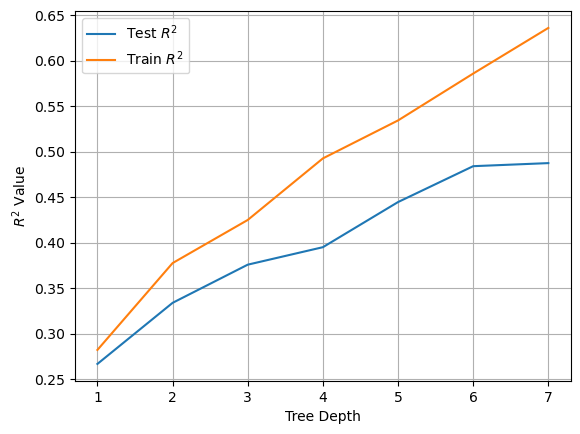

In [205]:
plt.plot(range(1,8), R2_DTR_test, label = 'Test $R^2$')
plt.plot(range(1,8), R2_DTR_train, label = 'Train $R^2$')
plt.xlabel('Tree Depth')
plt.ylabel('$R^2$ Value')
plt.grid()
plt.legend()
plt.show()



In [190]:
MSE_DTR_test = []
for tree in DTRs:
    MSE_DTR_test.append((sum(((y_test - tree.predict(X_test))**2))/len(y_test.index)))

In [191]:
MSE_DTR_test

[7.173045246909898,
 6.516382460111271,
 6.105736151513635,
 5.917780289521102,
 5.4325108788735745,
 5.046582566549243,
 5.013556060744609]

In [192]:
MSE_DTR_train = []
for tree in DTRs:
    MSE_DTR_train.append((sum(((y_train - tree.predict(X_train))**2))/len(y_train.index)))

In [193]:
MSE_DTR_train

[7.5048338244540735,
 6.50709948320107,
 6.011335620207723,
 5.303747343121682,
 4.86741322365608,
 4.328821853244557,
 3.8042226003078303]

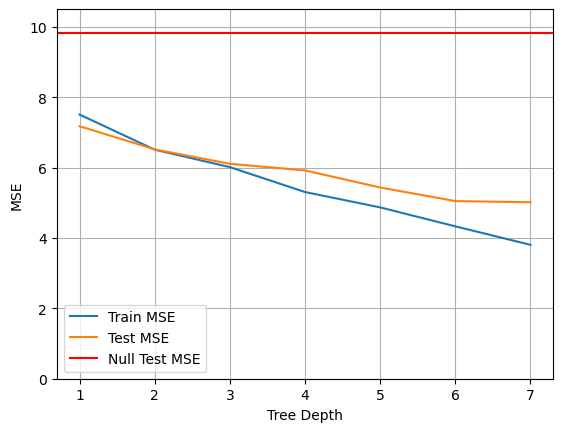

In [204]:
plt.plot(range(1,8), MSE_DTR_train, label = 'Train MSE')
plt.plot(range(1,8), MSE_DTR_test, label = 'Test MSE')
plt.axhline(MSE_test_null, label = 'Null Test MSE', color = 'Red')
plt.ylim(0,10.5)
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.grid()
plt.legend()

## Random Forest Regressor

In [206]:
ntrees = [10,30,100,300]
RFRs = []
for n in ntrees:
    RFRs.append(RandomForestRegressor(n_estimators=n, random_state=n).fit(X_train, y_train))